In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data.csv')
data

,Unnamed: 0,Country,Year,avg_rain,avg_temp,Pesticides (tonnes),Item,Yield (hg/ha)
0,0,Albania,1990,1485,16.37,121.00,Maize,36613
1,1,Albania,1990,1485,16.37,121.00,Potatoes,66667
2,2,Albania,1990,1485,16.37,121.00,"Rice, paddy",23333
3,3,Albania,1990,1485,16.37,121.00,Sorghum,12500
4,4,Albania,1990,1485,16.37,121.00,Soybeans,7000
...,...,...,...,...,...,...,...,...
28243,28243,Zimbabwe,2013,657,19.76,2550.07,"Rice, paddy",22581
28244,28244,Zimbabwe,2013,657,19.76,2550.07,Sorghum,3066
28245,28245,Zimbabwe,2013,657,19.76,2550.07,Soybeans,13142
28246,28246,Zimbabwe,2013,657,19.76,2550.07,Sweet potatoes,22222


In [3]:
data.drop(columns=['Unnamed: 0'], inplace=True)

## DATA MINING

### ARIMA-Auto Regressive Integrated Moving Average

C:\Users\Savan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Savan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Savan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Savan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


       Year  Forecasted_Yield
28248  2014      41617.611477
28249  2015      35441.873980
28250  2016      37478.207391
28251  2017      36806.764707
28252  2018      37028.160317
28253  2019      36955.159274
28254  2020      36979.229996
28255  2021      36971.293128
28256  2022      36973.910161
28257  2023      36973.047244


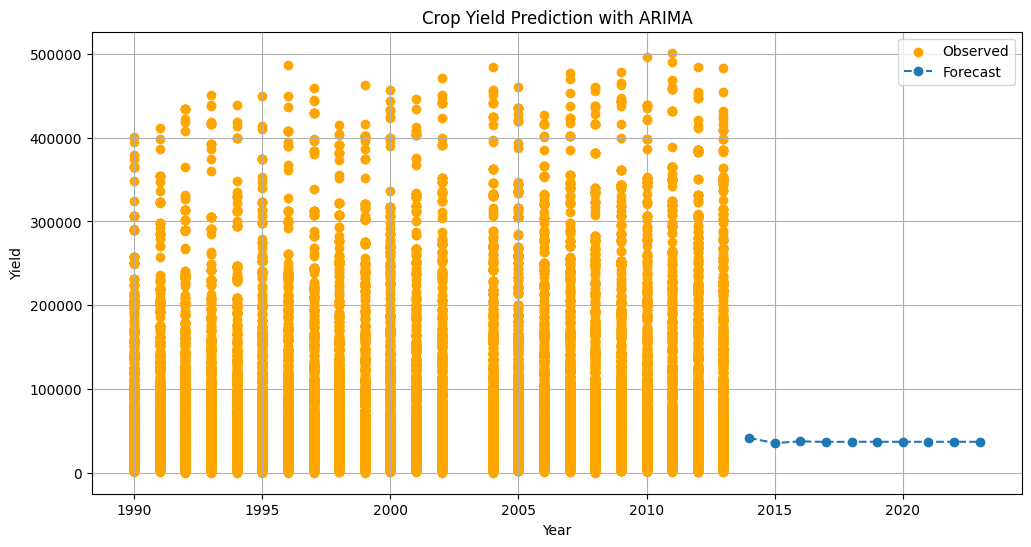

In [37]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('Data.csv') 

data.set_index('Year', inplace=True)

model = ARIMA(data['Yield (hg/ha)'], order=(1, 1, 1))  # Adjust ARIMA parameters as needed
fit_model = model.fit()

forecast_years = range(data.index[-1] + 1, data.index[-1] + 11)
forecast = fit_model.forecast(steps=10)

forecast_df = pd.DataFrame({'Year': forecast_years, 'Forecasted_Yield': forecast})
print(forecast_df)

plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['Yield (hg/ha)'], label='Observed', marker='o',color='orange')
plt.plot(forecast_years, forecast, label='Forecast', linestyle='--', marker='o')
plt.title('Crop Yield Prediction with ARIMA')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.legend()
plt.grid(True)
plt.show()


### LSTM - Long sort term memory

Epoch 1/100


C:\Users\Savan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


706/706 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0235
Epoch 2/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0173
Epoch 3/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0149
Epoch 4/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0137
Epoch 5/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0129
Epoch 6/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0124
Epoch 7/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0113
Epoch 8/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0104
Epoch 9/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0098
Epoch 10/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0095
Epoch 11/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0086
Epoch 12/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0081
Epoch 13/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0079
Epoch 14/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0073
Epoch 15/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step -

706/706 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0012
Epoch 81/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0013
Epoch 82/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0011
Epoch 83/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0011
Epoch 84/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0011
Epoch 85/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0012
Epoch 86/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0012
Epoch 87/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0011
Epoch 88/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0011
Epoch 89/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0011
Epoch 90/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0011
Epoch 91/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0010
Epoch 92/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0011
Epoch 93/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0010
Epoch 94/100
706/706 ━━━━━━━━━━━━━━━━━━━━ 3s 4m

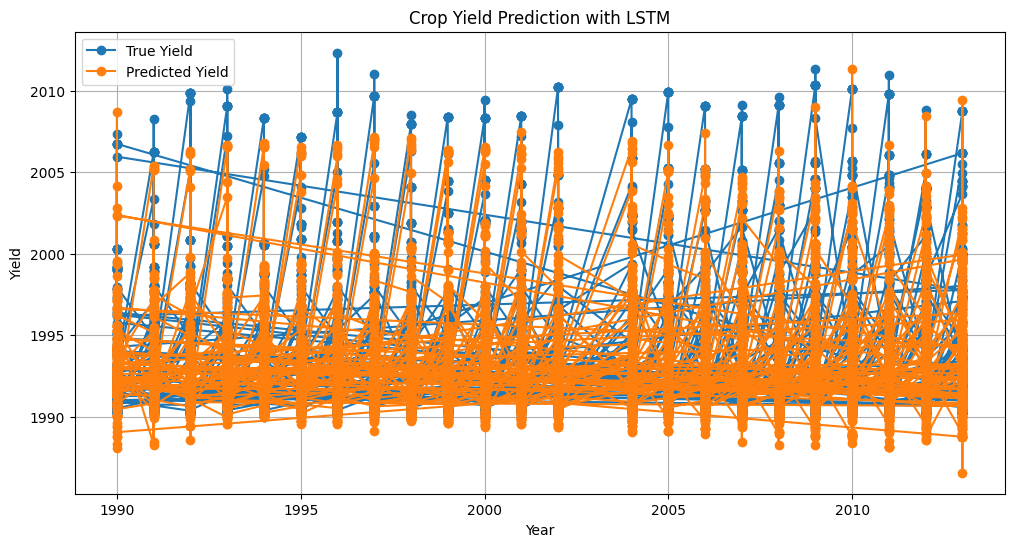

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data = pd.read_csv('Data.csv')

scaler = MinMaxScaler()
scaled_yield = scaler.fit_transform(data['Yield (hg/ha)'].values.reshape(-1, 1))
scaled_year = scaler.fit_transform(data['Year'].values.reshape(-1, 1))

scaled_data = np.concatenate((scaled_yield, scaled_year), axis=1)

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])  
    return np.array(X), np.array(y)

seq_length = 10 
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=100, batch_size=32)

mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Data: {mse}")

predictions = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(data['Year'].values[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='True Yield', marker='o')
plt.plot(data['Year'].values[-len(y_test):], scaler.inverse_transform(predictions), label='Predicted Yield', marker='o')
plt.title('Crop Yield Prediction with LSTM')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.legend()
plt.grid(True)
plt.show()
